
# Regras de associação 
***

O algoritmo de regras de associação pertence a classe de algortimos de aprendizado supervisionado. Seu principal objetivo é encontrar padrões relevantes nos dados. Padrões que possam ser usados para definir a estratégia do negócio ou para identificar um comportamento pouco usual.

### Definição
- As regras de Associação têm como premissa básica encontrar elementos que implicam na presença de outros elementos em uma mesma transação, ou seja, encontrar relacionamentos ou padrões frequentes entre conjuntos de dados. 

- O termo transação indica quais itens foram consultados em uma determinada operação de consulta.


Exemplo prático:
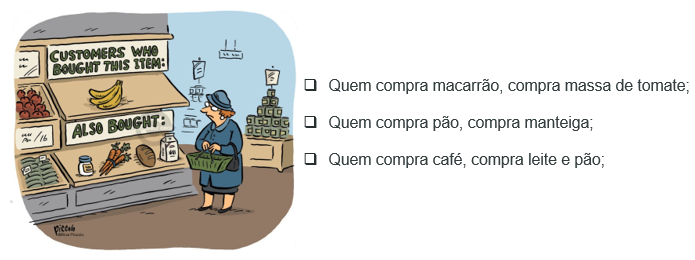

## Implementando algoritmo de regras de associação

Nesta atividade, vamos implemenar o algoritmo de regras de associação para uma lista de supermercados. Para isso, vamos executar os seguintes passos:


- Carregar o dataset de produtos
- Análise dos dados coletados
- Realizar o tratamento de dados
- Eliminar dados ausentes e/ou inválidos
- Criar de itens frequentes
- Aplicar modelo ML de regras de associação
- Visualizar as regras de associação criadas

### Instalando as bibliotecas

Primeiro passo é instlar as bibliotecas que serão utilizadas no projeto.

In [ ]:
!pip install mlxtend 
!pip install pandas

### Importando bilbiotecas

In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

### Selecionando o dataset de compras de  mercado

Nesta etapa, vamos abrir o arquivo de estudo.

In [2]:
PATH = r'C:\Users\leandro.figueira\Google Drive\IGTI\Aulas interativas\ABD\Fundamentos de BIg Data\Regras de associacao\datasets'
dados_mercado = pd.read_csv(PATH + '/mercado.csv', sep=';')

# Exibindo dados de compras de mercado
dados_mercado

,produto1,produto2,produto3,produto4
0,leite,cerveja,pao,manteiga
1,pao,cafe,manteiga,NaN
2,pao,cafe,manteiga,NaN
3,leite,cafe,pao,manteiga
4,cerveja,NaN,NaN,NaN
5,manteiga,NaN,NaN,NaN
6,pao,NaN,NaN,NaN
7,feijao,NaN,NaN,NaN
8,arroz,feijao,NaN,NaN
9,arroz,NaN,NaN,NaN


Observer que o dataset exemplificado ilustra compras de produtos

- Cada linha representa uma transação no qual é relizado registros de compras de produtos;
- Os valores NaN apresentados nas colunas significa valores nulos. Ou seja, não houve compra de produtos;

Exemplo: 
1. Na transação 0 foram comprados os  produtos: leite, cerveja, pão e manteiga

2. A transação 2 foram comprados os produtos: pão, cafe e leite

### Tratamento de dados

O algoritmo de regras de associação necessita que o input de dados seja em formato de lista contendo indicador de true or false para cada produto. 

Desta forma, temos que realizar tratamento de dados no dataset para satisfazer essa premissa.

A imagem abaixo ilustra a forma de entrada de dados.

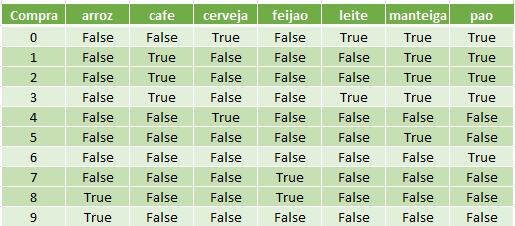

Observe que em cada transação possui um indicador de true ou false para cada produto existente no dataset.

In [3]:
# Visualizando tamanho do dataset
len(dados_mercado)

10

In [4]:
# Acessando o produto dentro da lista
print(dados_mercado.values[1,1]) # Linha 0 Coluna 3

cafe


In [5]:
# Temos que acessar cada item dentro do dataframe e inserir em uma lista
lista_compras = []
for i in range(len(dados_mercado)):  
    lista_compras.append([str(dados_mercado.values[i, j]) for j in range(4)])

In [6]:
#Visualizando lista de compras gerada
lista_compras

[['leite', 'cerveja', 'pao', 'manteiga'],
 ['pao', 'cafe', 'manteiga', 'nan'],
 ['pao', 'cafe', 'manteiga', 'nan'],
 ['leite', 'cafe', 'pao', 'manteiga'],
 ['cerveja', 'nan', 'nan', 'nan'],
 ['manteiga', 'nan', 'nan', 'nan'],
 ['pao', 'nan', 'nan', 'nan'],
 ['feijao', 'nan', 'nan', 'nan'],
 ['arroz', 'feijao', 'nan', 'nan'],
 ['arroz', 'nan', 'nan', 'nan']]

### Criando lista de produtos com indicador de true or false

Nesta etapa vamos criar a lista com todos os produtos do dataset e informando a transação e seus respectivos itens.

In [7]:
te = TransactionEncoder()
te_array = te.fit(lista_compras).transform(lista_compras)

In [8]:
#visualizando lista de produtos criada
te_array

array([[False, False,  True, False,  True,  True, False,  True],
       [False,  True, False, False, False,  True,  True,  True],
       [False,  True, False, False, False,  True,  True,  True],
       [False,  True, False, False,  True,  True, False,  True],
       [False, False,  True, False, False, False,  True, False],
       [False, False, False, False, False,  True,  True, False],
       [False, False, False, False, False, False,  True,  True],
       [False, False, False,  True, False, False,  True, False],
       [ True, False, False,  True, False, False,  True, False],
       [ True, False, False, False, False, False,  True, False]])

### Criando dataframe com itens do mercado

Vamos criar o dataframe através da lista criada e infomando as colunas que representam os itens do dataset.

In [9]:
df_prod_mercado = pd.DataFrame(te_array, columns = te.columns_)
#Visualizando o dataframe
df_prod_mercado

,arroz,cafe,cerveja,feijao,leite,manteiga,nan,pao
0,False,False,True,False,True,True,False,True
1,False,True,False,False,False,True,True,True
2,False,True,False,False,False,True,True,True
3,False,True,False,False,True,True,False,True
4,False,False,True,False,False,False,True,False
5,False,False,False,False,False,True,True,False
6,False,False,False,False,False,False,True,True
7,False,False,False,True,False,False,True,False
8,True,False,False,True,False,False,True,False
9,True,False,False,False,False,False,True,False


### Excluindo coluna 'nan' do dataframe

Obserevem que ao transformar os dados, as colunas que possuiam valores ausentes do tipo "Nan" foram incluidads como um produto do mercado. No entanto, isso não é verdadeiro. Dessa forma, vamos eliminar essa coluna do nosso dataframe.

In [10]:
df_prod_mercado.drop(columns='nan', inplace=True)

In [11]:
#visualizando conjunto de dados
df_prod_mercado

,arroz,cafe,cerveja,feijao,leite,manteiga,pao
0,False,False,True,False,True,True,True
1,False,True,False,False,False,True,True
2,False,True,False,False,False,True,True
3,False,True,False,False,True,True,True
4,False,False,True,False,False,False,False
5,False,False,False,False,False,True,False
6,False,False,False,False,False,False,True
7,False,False,False,True,False,False,False
8,True,False,False,True,False,False,False
9,True,False,False,False,False,False,False


### Gerando os itens  frequentes no dataset

Nesta etapa vamos gerar os itens sets mais frequentes no nosso dataframe. Para isso, vamos utiizar a biblioteca apriori.

In [12]:
from mlxtend.frequent_patterns import apriori

In [13]:
frequent_itemsets =  apriori(df_prod_mercado, min_support=0.3, use_colnames=True) # Seleciono apenas suporte de 0,4
frequent_itemsets

,support,itemsets
0,0.3,(cafe)
1,0.5,(manteiga)
2,0.5,(pao)
3,0.3,"(manteiga, cafe)"
4,0.3,"(cafe, pao)"
5,0.4,"(manteiga, pao)"
6,0.3,"(manteiga, cafe, pao)"


Selecionamos itens sets com o suporte de 30% nesse experimento. 

### Criando as regras de associação

Após a criação dos itens mais frequentes, o proximo passo é criar as regras de associação. Vamos importar a biblioteca association_rules para gerar as regras.

In [14]:
from mlxtend.frequent_patterns import association_rules

In [15]:
regras = association_rules(frequent_itemsets, metric='confidence',min_threshold=0.8) # 80% regras acontecerem
#visualizando as regras criadas
regras

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(cafe),(manteiga),0.3,0.5,0.3,1.0,2.0,0.15,inf
1,(cafe),(pao),0.3,0.5,0.3,1.0,2.0,0.15,inf
2,(manteiga),(pao),0.5,0.5,0.4,0.8,1.6,0.15,2.5
3,(pao),(manteiga),0.5,0.5,0.4,0.8,1.6,0.15,2.5
4,"(manteiga, cafe)",(pao),0.3,0.5,0.3,1.0,2.0,0.15,inf
5,"(cafe, pao)",(manteiga),0.3,0.5,0.3,1.0,2.0,0.15,inf
6,(cafe),"(manteiga, pao)",0.3,0.4,0.3,1.0,2.5,0.18,inf


### Selecionando colunas a serem analisadas

In [16]:
regras = regras[['antecedents','consequents', 'support','confidence','lift']]

### Renomeando colunas

In [17]:
regras = regras.rename(columns={"antecedents": "se", "consequents": "então", 
                       "support": "suporte", 
                       "confidence": "confiança", "lift": "LIFT"})

In [18]:
regras

,se,então,suporte,confiança,LIFT
0,(cafe),(manteiga),0.3,1.0,2.0
1,(cafe),(pao),0.3,1.0,2.0
2,(manteiga),(pao),0.4,0.8,1.6
3,(pao),(manteiga),0.4,0.8,1.6
4,"(manteiga, cafe)",(pao),0.3,1.0,2.0
5,"(cafe, pao)",(manteiga),0.3,1.0,2.0
6,(cafe),"(manteiga, pao)",0.3,1.0,2.5


### Filtrando as melhores regras baseado no LIFT

In [19]:
regras.sort_values(by = 'LIFT', ascending = False)

,se,então,suporte,confiança,LIFT
6,(cafe),"(manteiga, pao)",0.3,1.0,2.5
0,(cafe),(manteiga),0.3,1.0,2.0
1,(cafe),(pao),0.3,1.0,2.0
4,"(manteiga, cafe)",(pao),0.3,1.0,2.0
5,"(cafe, pao)",(manteiga),0.3,1.0,2.0
2,(manteiga),(pao),0.4,0.8,1.6
3,(pao),(manteiga),0.4,0.8,1.6


### Resultados obtidos

A tabela acima demonstra as regras de associação criadas através do dataset de produtos. Através dela, podemos observar os itens sets e seus relacionamentos. Bem como, suas metricas de suporte, confiança e LIFT.

**Exemplo de leitura da tabela:**

Analisando a primeira linha do dataframe: Se (café) então (manteiga e pão)

- Clientes que compram café tem 2,5 vezes mais chances de comprarem manteiga e pão;
- Em 100% dos casos, clientes que compram café também compram manteiga e pão;